## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;"> House Price Prediction </p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;"> Exploratory Data Analysis (EDA) </p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:120%; text-align:center; border-radius:10px 10px;">Tayfun KOK</p>

# Importing Related Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Recognizing and Understanding the Dataset

In [2]:
df=pd.read_csv('raw_house_data.csv')
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [3]:
df.shape

(5000, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory 

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000


In [7]:
df.isnull().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces           0
floor_covering       0
HOA                  0
dtype: int64

# Data Cleaning & Handling with Missing Values

## MLS

In [8]:
df.MLS.nunique()

5000

All vaues of MLS are unique. Therefore, this column is not useful for machine learning models. So I will drop it. 

In [9]:
df.drop('MLS', axis=1, inplace=True)

In [10]:
df.shape

(5000, 15)

## sold_price

In [11]:
df.sold_price.describe()

count    5.000000e+03
mean     7.746262e+05
std      3.185556e+05
min      1.690000e+05
25%      5.850000e+05
50%      6.750000e+05
75%      8.350000e+05
max      5.300000e+06
Name: sold_price, dtype: float64

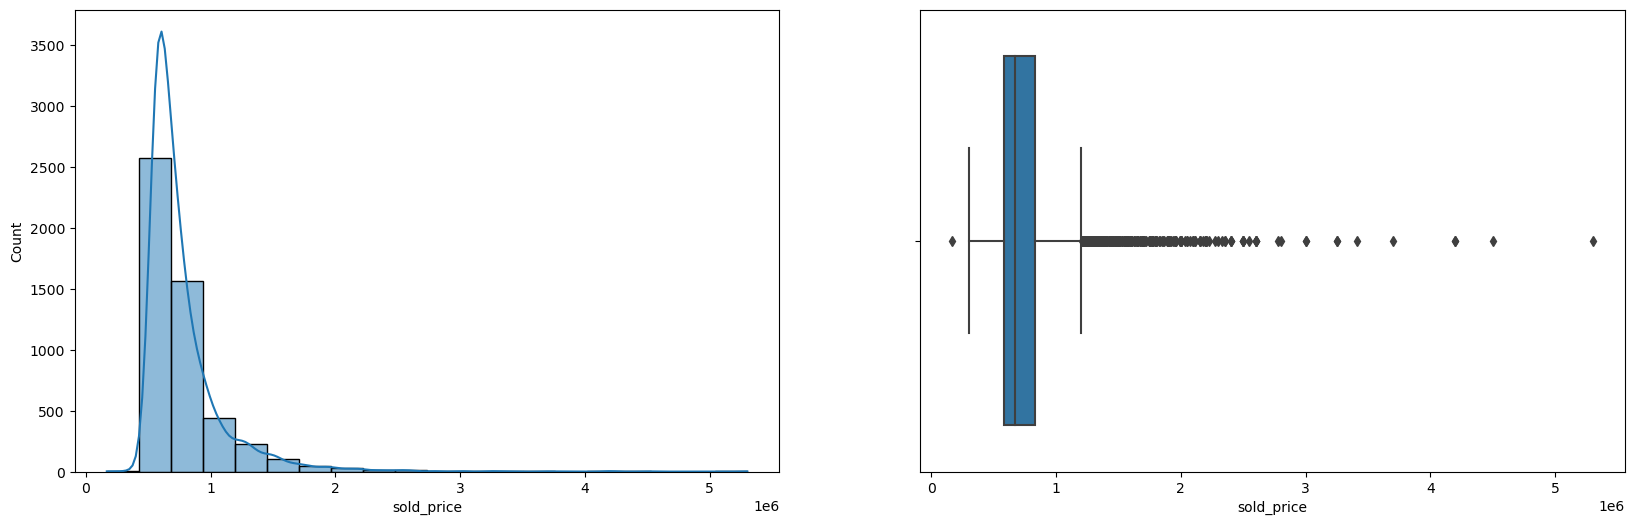

In [12]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.sold_price, bins=20, kde=True)

plt.subplot(122)
sns.boxplot(df.sold_price)
plt.show()

In [13]:
Q1=np.percentile(df.sold_price,25)
Q3=np.percentile(df.sold_price,75)
IQR=stats.iqr(df.sold_price)
Q1,Q3,IQR

(585000.0, 835000.0, 250000.0)

In [14]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
lower_lim,upper_lim

(210000.0, 1210000.0)

In [15]:
not_outliers = (df.sold_price >= lower_lim) & (df.sold_price <= upper_lim)
df[not_outliers].head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
151,1200000.0,85750,-110.842117,32.275107,8.80,12946.09,1954,7,11,10417,0,"Dishwasher, Garbage Disposal, Microwave, Oven",5,"Carpet, Mexican Tile, Wood",0
217,1100000.0,85755,-110.992897,32.461571,1.39,19156.00,2001,4,4,5164,3,"Dishwasher, Freezer, Garbage Disposal, Refrige...",4,"Carpet, Natural Stone",153
219,1150000.0,85749,-110.718155,32.279066,11.49,10716.00,2007,4,5,4330,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",3,"Carpet, Wood, Other",0
240,1200000.0,85750,-110.844774,32.326842,1.21,10610.26,2002,4,4,4426,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",0,Natural Stone,117
259,1200000.0,85646,-111.040290,31.594518,91.70,8473.86,1925,6,5,6884,0,None,7,"Carpet, Concrete",0


In [16]:
df=df[not_outliers]

In [17]:
df.shape

(4605, 15)

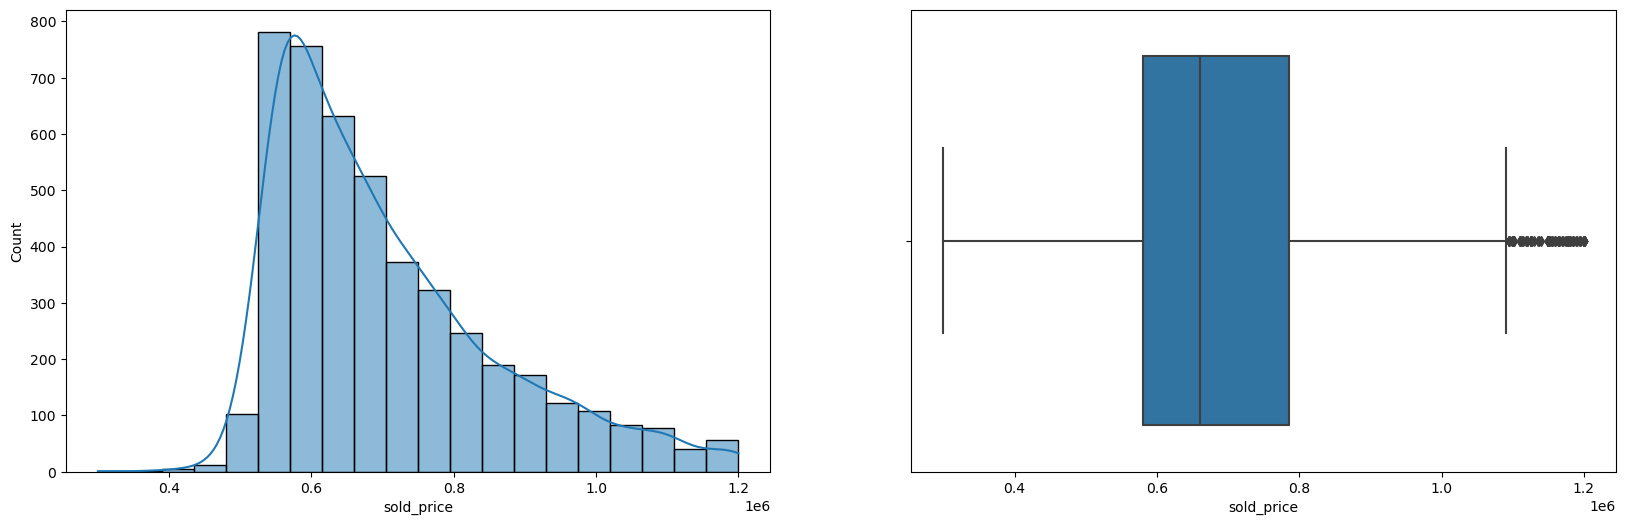

In [18]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.sold_price, bins=20, kde=True)

plt.subplot(122)
sns.boxplot(df.sold_price)
plt.show()

## Zipcode

In [19]:
df.zipcode.dtype.type

numpy.int64

In [20]:
df.zipcode.nunique()

54

In [21]:
df.zipcode.value_counts()

85718    1187
85750     710
85755     432
85749     383
85737     277
85658     213
85742     158
85745     154
85739     148
85716     103
85704      97
85715      79
85743      76
85719      70
85641      66
85748      59
85646      56
85614      50
85712      41
85623      31
85622      29
85730      27
85637      23
85747      15
85629      14
85701      13
85705      11
85630       9
85645       9
85611       9
85624       8
85619       7
85711       6
85621       5
85648       4
85615       3
85710       2
85601       2
85643       2
85602       2
85610       2
85713       1
85638       1
85935       1
85625       1
85901       1
86323       1
85541       1
85929       1
85605       1
85118       1
85640       1
85603       1
85192       1
Name: zipcode, dtype: int64

## Longitude

Longitudes are vertical lines that measure east or west of the meridian in Greenwich, England. 

In [22]:
df.longitude.describe()

count    4605.000000
mean     -110.910509
std         0.121383
min      -112.520168
25%      -110.978858
50%      -110.922819
75%      -110.858667
max      -109.454637
Name: longitude, dtype: float64

In [23]:
df.longitude.nunique()

4390

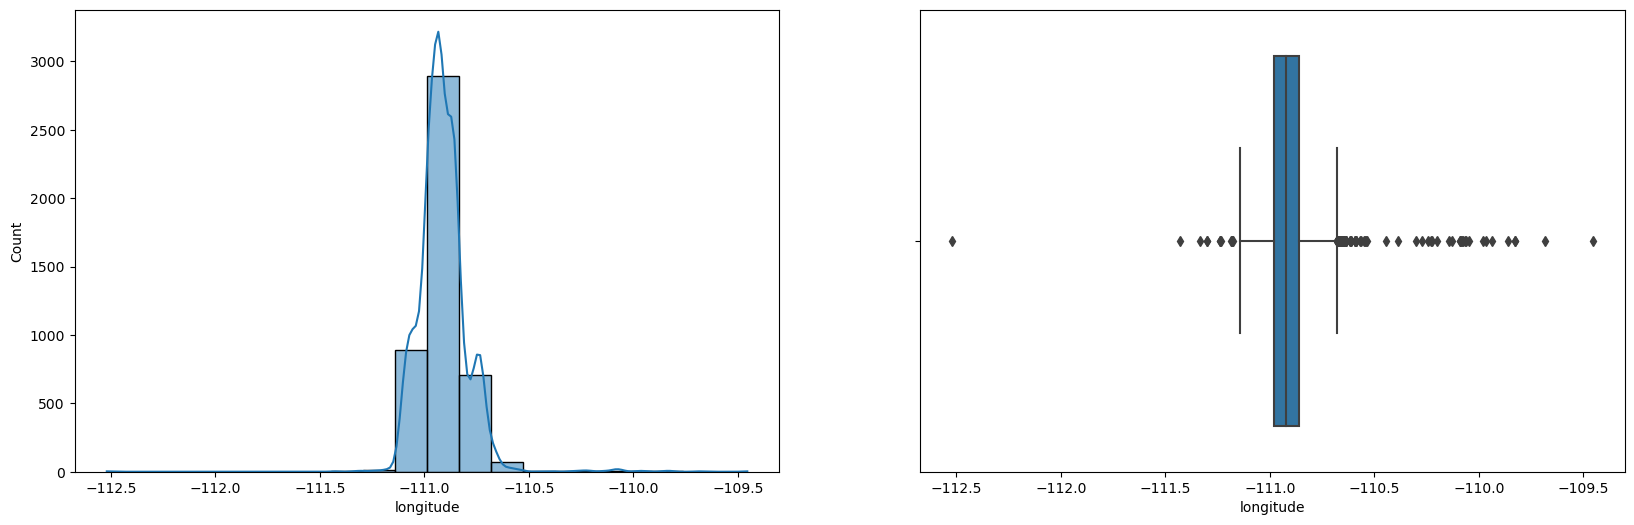

In [24]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.longitude,bins=20, kde=True)

plt.subplot(122)
sns.boxplot(df.longitude)
plt.show()

In [25]:
Q1=np.percentile(df.longitude,25)
Q3=np.percentile(df.longitude,75)
IQR=stats.iqr(df.longitude)
Q1,Q3,IQR

(-110.978858, -110.858667, 0.12019100000000549)

In [26]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
lower_lim,upper_lim

(-111.15914450000001, -110.67838049999999)

In [27]:
not_outliers = (df.longitude>= lower_lim) & (df.longitude <= upper_lim)
df[not_outliers].shape

(4501, 15)

In [28]:
df=df[not_outliers]

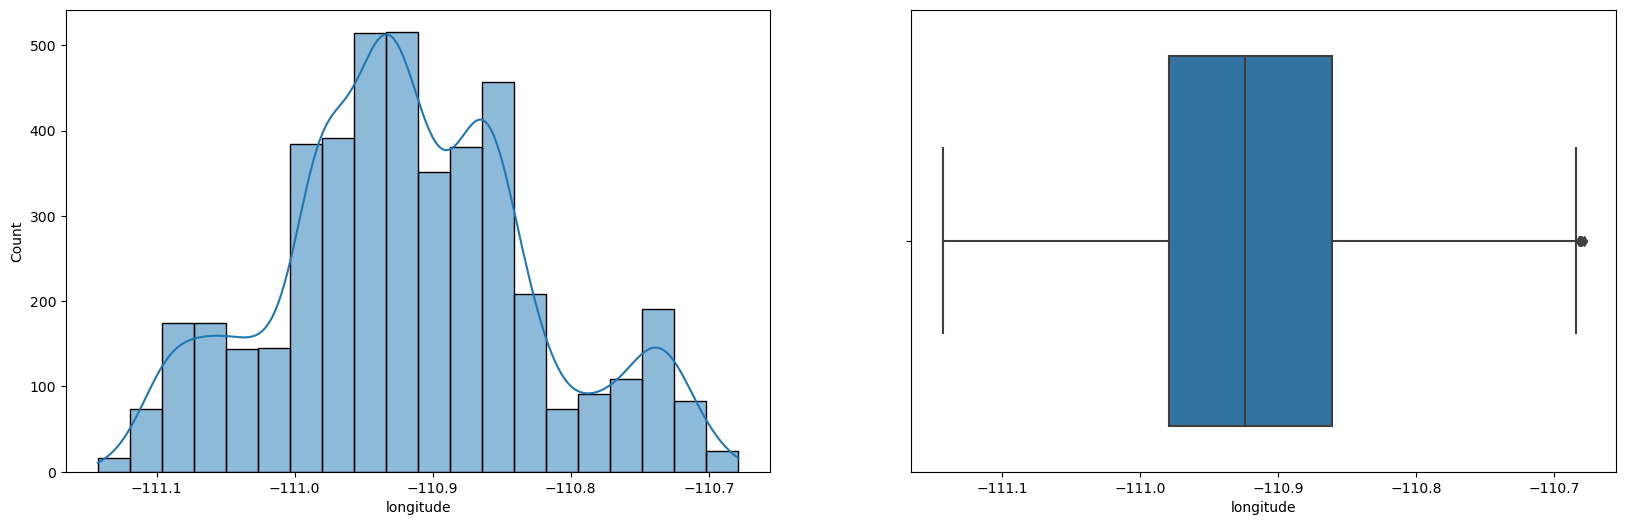

In [29]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.longitude,bins=20, kde=True)

plt.subplot(122)
sns.boxplot(df.longitude)
plt.show()

## Latitude

Latitudes are horizontal lines that measure distance north or south of the equator. 

In [30]:
df.latitude.describe()

count    4501.000000
mean       32.312265
std         0.148516
min        31.361562
25%        32.279615
50%        32.318249
75%        32.394440
max        32.964708
Name: latitude, dtype: float64

In [31]:
df.latitude.nunique()

4343

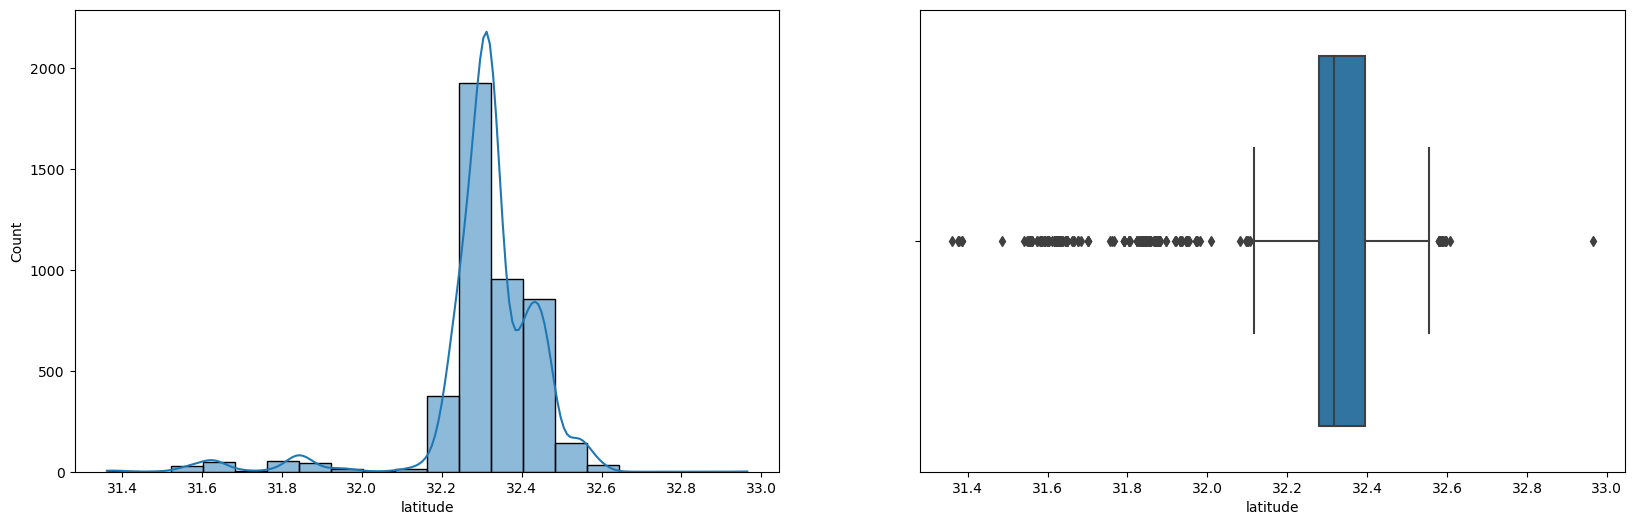

In [32]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.latitude,bins=20,kde=True)

plt.subplot(122)
sns.boxplot(df.latitude)
plt.show()

In [33]:
Q1=np.percentile(df.latitude,25)
Q3=np.percentile(df.latitude,75)
IQR=stats.iqr(df.latitude)
Q1,Q3,IQR

(32.279615, 32.39444, 0.11482500000000329)

In [34]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
lower_lim,upper_lim

(32.1073775, 32.56667750000001)

In [35]:
not_outliers = (df.latitude>= lower_lim) & (df.latitude <= upper_lim)
df[not_outliers].shape

(4266, 15)

In [36]:
df=df[not_outliers]

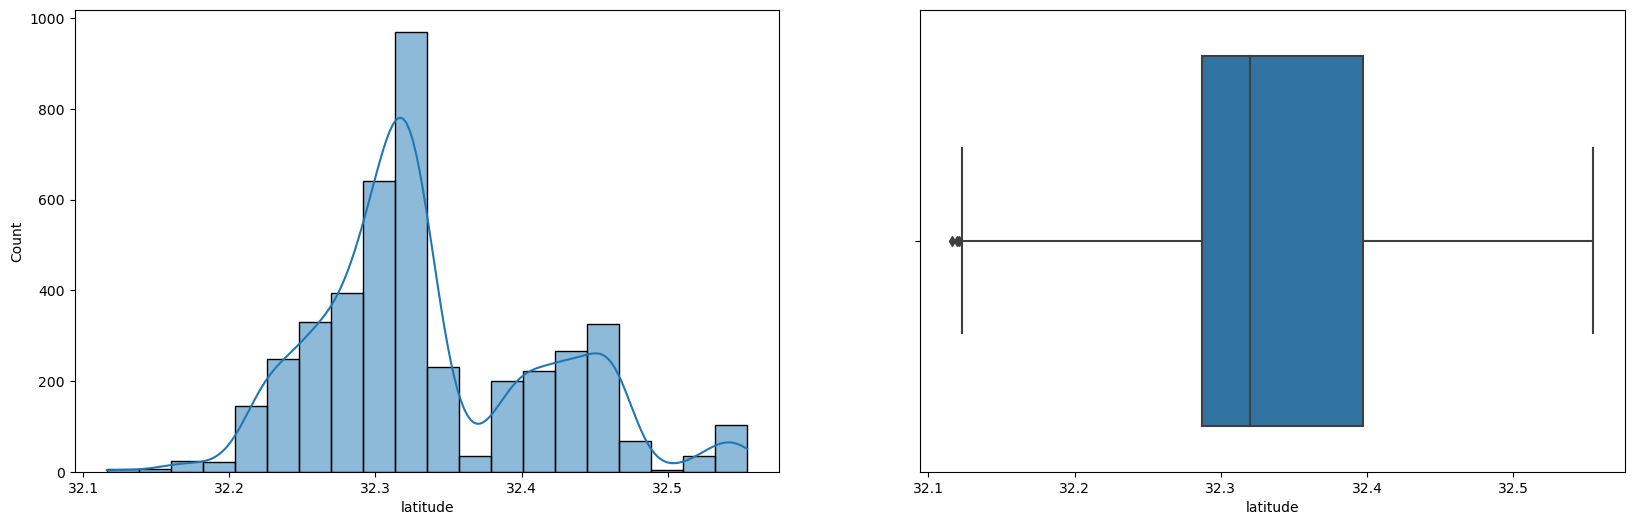

In [37]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.latitude,bins=20,kde=True)

plt.subplot(122)
sns.boxplot(df.latitude)
plt.show()

## lot_acres

In [38]:
df.lot_acres.describe()

count    4266.000000
mean        1.512161
std         2.470803
min         0.000000
25%         0.550000
50%         0.920000
75%         1.500000
max        60.570000
Name: lot_acres, dtype: float64

In [39]:
df.lot_acres.isnull().sum()

0

In [40]:
df[df.lot_acres.isnull()]

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA


In [41]:
df.lot_acres.fillna(method="ffill", inplace=True)

In [42]:
df.lot_acres.isnull().sum()

0

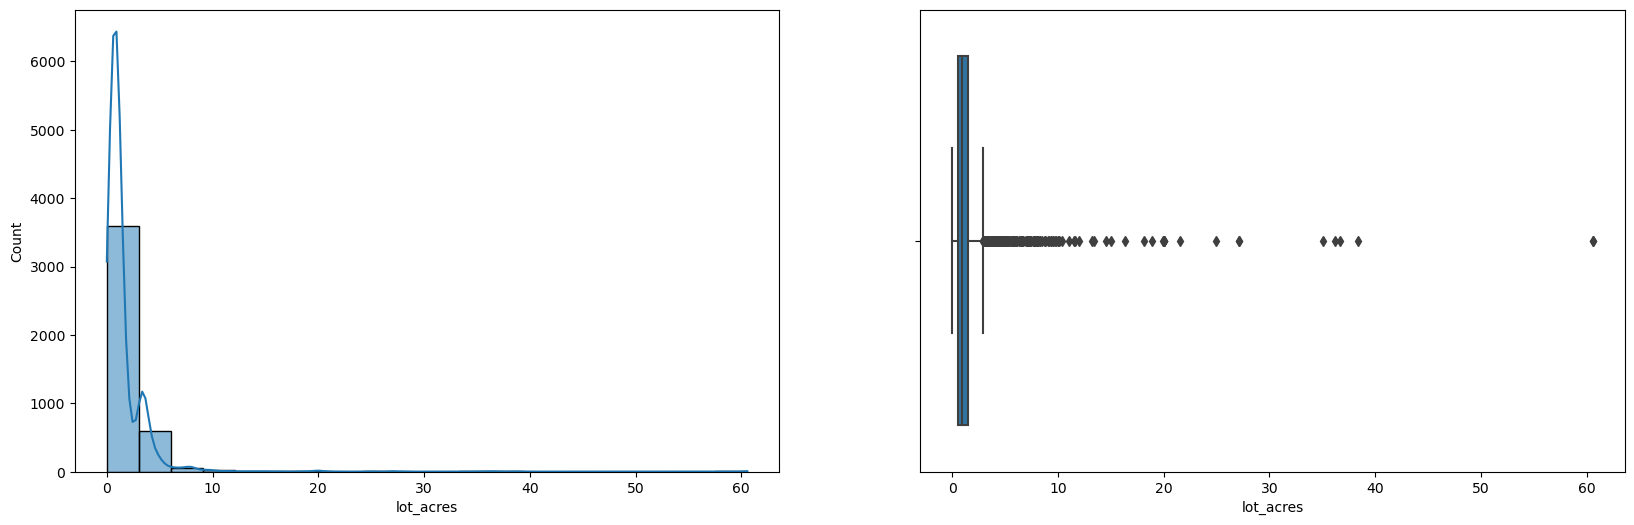

In [43]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.lot_acres,bins=20,kde=True)

plt.subplot(122)
sns.boxplot(df.lot_acres)
plt.show()

In [44]:
df[df.lot_acres==555.600000]

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA


In [45]:
Q1=np.percentile(df.lot_acres,25)
Q3=np.percentile(df.lot_acres,75)
IQR=stats.iqr(df.lot_acres)
Q1, Q3, IQR

(0.55, 1.5, 0.95)

In [46]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
lower_lim,upper_lim

(-0.8749999999999998, 2.925)

In [47]:
not_outliers = (df.lot_acres >= lower_lim) & (df.lot_acres <= upper_lim)
df[not_outliers].shape

(3571, 15)

In [48]:
df=df[not_outliers]

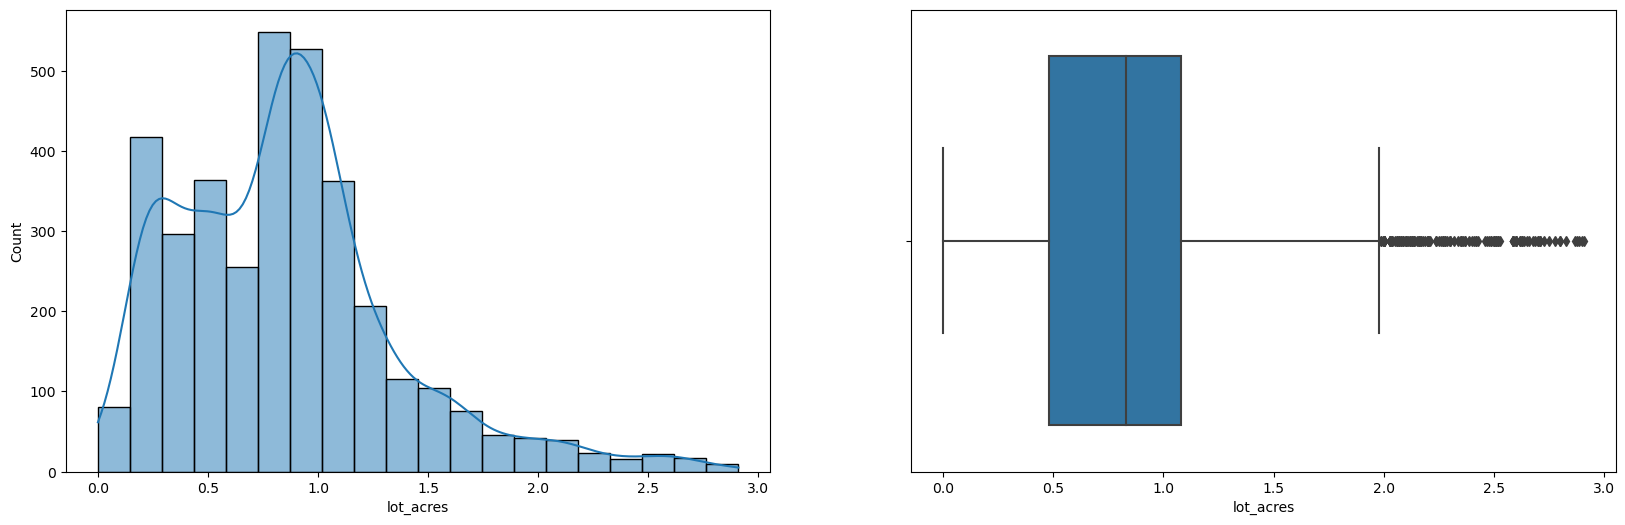

In [49]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.lot_acres,bins=20,kde=True)

plt.subplot(122)
sns.boxplot(df.lot_acres)
plt.show()

## Taxes

In [50]:
df.taxes.describe()

count    3.571000e+03
mean     9.909884e+03
std      2.046185e+05
min      0.000000e+00
25%      4.723940e+03
50%      6.025300e+03
75%      7.622840e+03
max      1.221508e+07
Name: taxes, dtype: float64

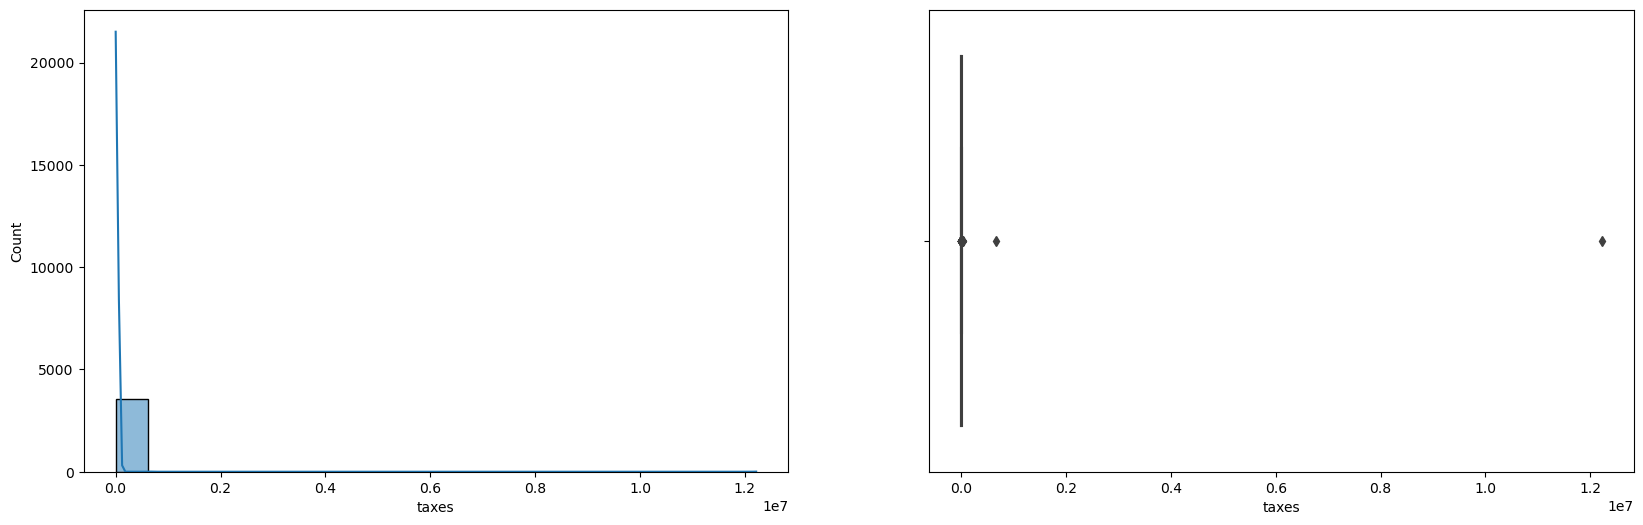

In [51]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.taxes, bins=20, kde=True)

plt.subplot(122)
sns.boxplot(df.taxes);
plt.show()

In [52]:
df[df.taxes==df.taxes.max()]

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
715,1040000.0,85718,-110.909653,32.301099,1.43,12215075.0,1987,4,4,5729,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",3,"Ceramic Tile, Natural Stone",193


In [53]:
Q1=np.percentile(df.taxes,25)
Q3=np.percentile(df.taxes,75)
IQR=stats.iqr(df.taxes)
Q1,Q3,IQR

(4723.9400000000005, 7622.84, 2898.8999999999996)

In [54]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
lower_lim,upper_lim

(375.59000000000106, 11971.189999999999)

In [55]:
not_outliers = (df.taxes >= lower_lim) & (df.taxes <= upper_lim)
df[not_outliers].head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
240,1200000.0,85750,-110.844774,32.326842,1.21,10610.26,2002,4,4,4426,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",0,Natural Stone,117
309,1175000.0,85658,-111.099960,32.470520,0.33,11407.46,2008,3,4,3388,2,"Dishwasher, Refrigerator, Microwave, Oven",2,Wood,550
355,1189550.0,85658,-111.100125,32.469548,0.29,845.18,2010,3,4,2990,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2,"Carpet, Concrete, Natural Stone, Wood",550
359,1200000.0,85750,-110.846659,32.326433,1.05,9450.00,1999,4,3,4169,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2,"Carpet, Natural Stone",110
367,1050000.0,85742,-111.027725,32.359005,2.03,9285.00,1998,3,5,6428,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",4,"Carpet, Concrete, Wood",0


In [56]:
df=df[not_outliers]

In [57]:
df.shape

(3432, 15)

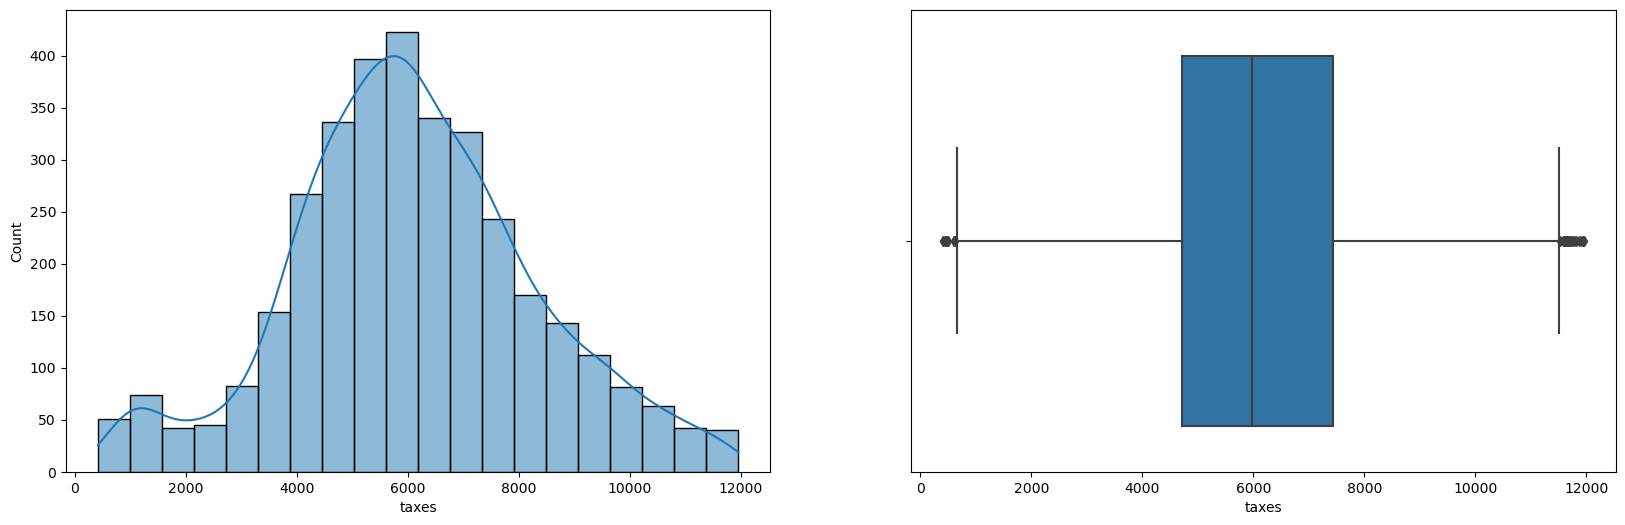

In [58]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.taxes, bins=20, kde=True)

plt.subplot(122)
sns.boxplot(df.taxes);
plt.show()

## year_built 

In [59]:
df.year_built.dtype

dtype('int64')

In [60]:
df.year_built.value_counts(dropna=False)

2002    164
2005    145
2006    145
2004    141
1999    134
       ... 
1944      1
1913      1
1923      1
1893      1
1927      1
Name: year_built, Length: 111, dtype: int64

In [61]:
year_max=df.year_built.max()
year_max

2019

In [62]:
df["age"]=year_max-df.year_built

In [63]:
df.drop("year_built", axis=1, inplace=True)

In [64]:
df.head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,age
240,1200000.0,85750,-110.844774,32.326842,1.21,10610.26,4,4,4426,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",0,Natural Stone,117,17
309,1175000.0,85658,-111.099960,32.470520,0.33,11407.46,3,4,3388,2,"Dishwasher, Refrigerator, Microwave, Oven",2,Wood,550,11
355,1189550.0,85658,-111.100125,32.469548,0.29,845.18,3,4,2990,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2,"Carpet, Concrete, Natural Stone, Wood",550,9
359,1200000.0,85750,-110.846659,32.326433,1.05,9450.00,4,3,4169,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2,"Carpet, Natural Stone",110,20
367,1050000.0,85742,-111.027725,32.359005,2.03,9285.00,3,5,6428,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",4,"Carpet, Concrete, Wood",0,21


In [65]:
df.shape

(3432, 15)

In [66]:
df.age.value_counts()

17     164
14     145
13     145
15     141
20     134
      ... 
75       1
106      1
96       1
126      1
92       1
Name: age, Length: 111, dtype: int64

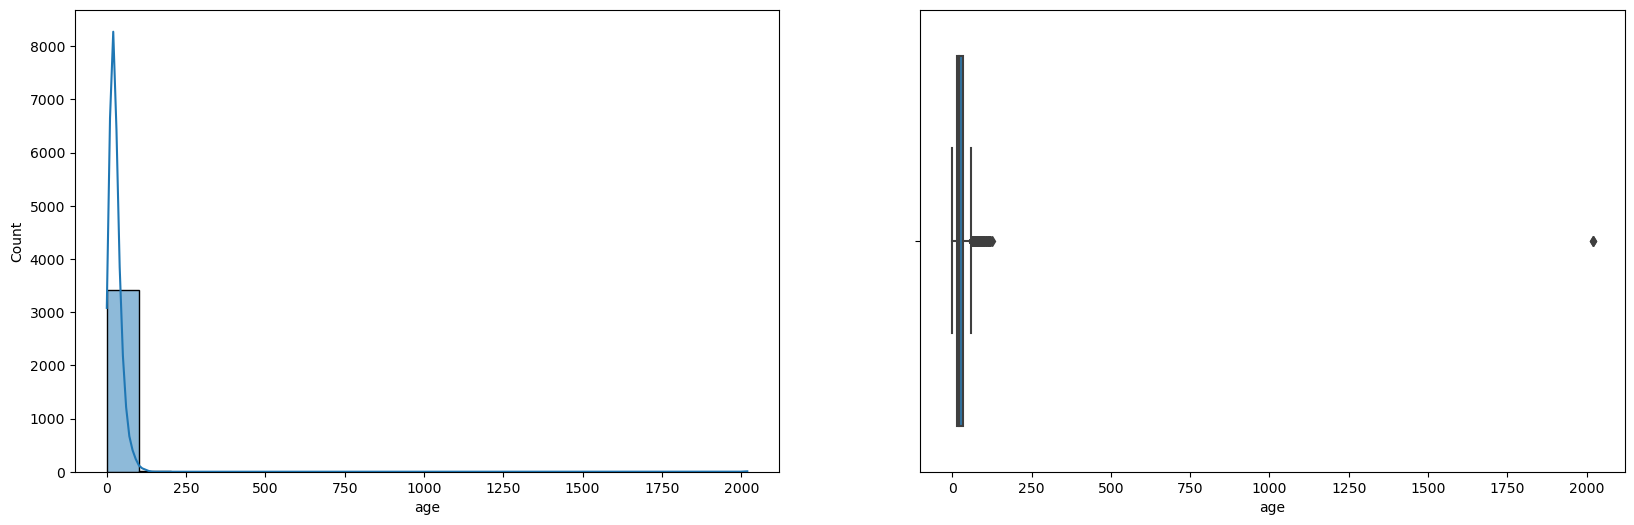

In [67]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.age, bins=20, kde=True)

plt.subplot(122)
sns.boxplot(df.age);
plt.show()

In [68]:
df[df.age==df.age.max()]

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,age
1438,877170.0,85755,-110.977158,32.459429,0.60,2005.57,3,4,3078,3,"Dishwasher, Garbage Disposal, Microwave, Oven",0,Other,167,2019
1767,700000.0,85701,-110.963672,32.216996,0.13,7059.56,3,3,2500,3,"Dishwasher, Electric Range, Garbage Disposal, ...",0,Other: Recycled Porcelain,74,2019


In [69]:
df.drop(df[df.age==df.age.max()].index, axis=0, inplace=True)

In [70]:
Q1=np.percentile(df.age,25)
Q3=np.percentile(df.age,75)
IQR=stats.iqr(df.age)
Q1,Q3,IQR

(15.0, 33.0, 18.0)

In [71]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
lower_lim,upper_lim

(-12.0, 60.0)

In [72]:
not_outliers = (df.age>= lower_lim) & (df.age<= upper_lim)
df[not_outliers].head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,age
240,1200000.0,85750,-110.844774,32.326842,1.21,10610.26,4,4,4426,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",0,Natural Stone,117,17
309,1175000.0,85658,-111.099960,32.470520,0.33,11407.46,3,4,3388,2,"Dishwasher, Refrigerator, Microwave, Oven",2,Wood,550,11
355,1189550.0,85658,-111.100125,32.469548,0.29,845.18,3,4,2990,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2,"Carpet, Concrete, Natural Stone, Wood",550,9
359,1200000.0,85750,-110.846659,32.326433,1.05,9450.00,4,3,4169,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2,"Carpet, Natural Stone",110,20
367,1050000.0,85742,-111.027725,32.359005,2.03,9285.00,3,5,6428,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",4,"Carpet, Concrete, Wood",0,21


In [73]:
df=df[not_outliers]
df.shape

(3256, 15)

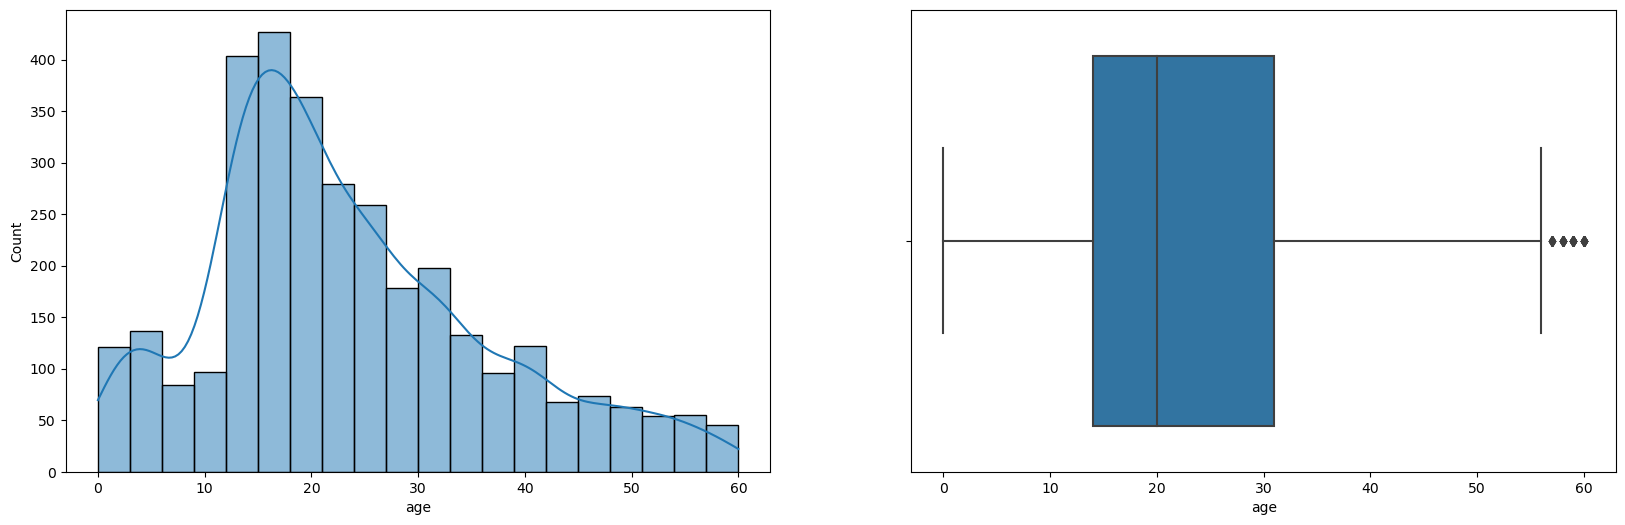

In [74]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.age, bins=20, kde=True)

plt.subplot(122)
sns.boxplot(df.age)
plt.show()

## Bedrooms

In [75]:
df.bedrooms.value_counts()

4     1648
3      949
5      512
2       98
6       43
7        4
9        1
10       1
Name: bedrooms, dtype: int64

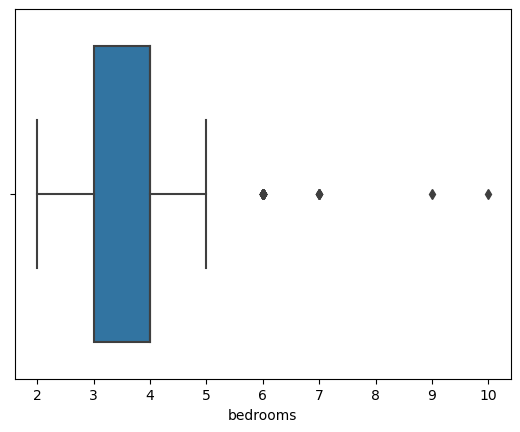

In [76]:
sns.boxplot(df.bedrooms);

In [77]:
df=df[(df.bedrooms>=2) & (df.bedrooms<=6)]
df.shape

(3250, 15)

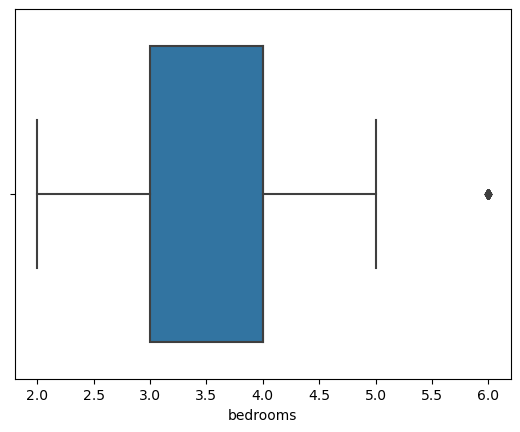

In [78]:
sns.boxplot(df.bedrooms);

## Bathrooms

In [79]:
df.bathrooms.value_counts()

3    1485
4    1261
5     300
2     140
6      57
7       7
Name: bathrooms, dtype: int64

In [80]:
df[df.bathrooms=='None']

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,age


In [81]:
df.bathrooms.replace("None",np.nan,inplace=True)

In [82]:
df.bathrooms.isnull().sum()

0

In [83]:
df.bathrooms.dtype

dtype('O')

In [84]:
df.bathrooms=df.bathrooms.astype("float64")

In [85]:
for group in df["bedrooms"].unique():
    cond = df["bedrooms"]==group
    mode = df[cond]["bathrooms"].mode().to_list()  # list(df[cond]["body_type"].mode())
    if mode != []:
        df.loc[cond, "bathrooms"] = df.loc[cond, "bathrooms"].fillna(df[cond]["bathrooms"].mode()[0])
    else:
        df.loc[cond, "bathrooms"] = df.loc[cond, "bathrooms"].fillna(df["bathrooms"].mode()[0])

In [86]:
df.bathrooms.isnull().sum()

0

In [87]:
df.bathrooms.value_counts()

3.0    1485
4.0    1261
5.0     300
2.0     140
6.0      57
7.0       7
Name: bathrooms, dtype: int64

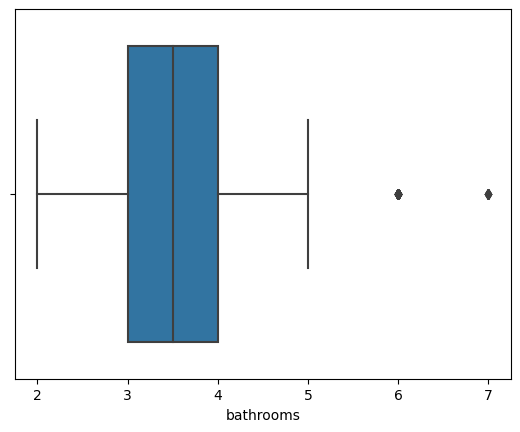

In [88]:
sns.boxplot(df.bathrooms);

In [89]:
df[df.bathrooms==3.5]

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,age


In [90]:
df[df.bathrooms==2.5]

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,age


In [91]:
df.bathrooms.replace({3.5:4, 2.5:3}, inplace=True)

In [92]:
df.bathrooms.value_counts()

3.0    1485
4.0    1261
5.0     300
2.0     140
6.0      57
7.0       7
Name: bathrooms, dtype: int64

In [93]:
df[df.bathrooms==36]

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,age


In [94]:
df.drop(df[df.bathrooms==36].index, axis=0, inplace=True)

In [95]:
df.bathrooms.value_counts()

3.0    1485
4.0    1261
5.0     300
2.0     140
6.0      57
7.0       7
Name: bathrooms, dtype: int64

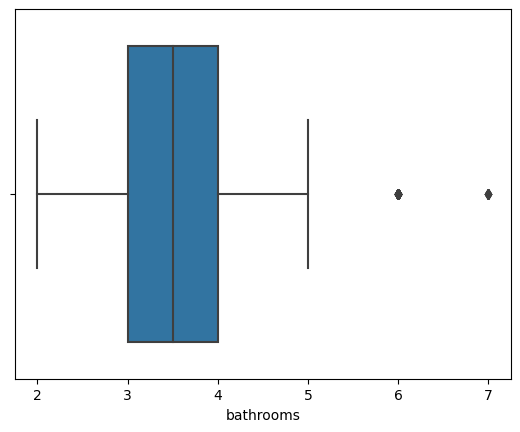

In [96]:
sns.boxplot(df.bathrooms);

## sqrt_ft

In [97]:
df.sqrt_ft.value_counts()

3541    48
3052    25
3420    17
3811    16
3002    11
        ..
3762     1
4468     1
3559     1
2130     1
2318     1
Name: sqrt_ft, Length: 1664, dtype: int64

In [98]:
df.sqrt_ft.replace("None",np.nan,inplace=True)

In [99]:
df.sqrt_ft.dtype

dtype('O')

In [100]:
df.sqrt_ft=df.sqrt_ft.astype("float64")
df.sqrt_ft.dtype

dtype('float64')

In [101]:
df.sqrt_ft.describe()

count    3250.000000
mean     3457.361538
std       703.600882
min      1690.000000
25%      2985.500000
50%      3400.000000
75%      3834.000000
max      6789.000000
Name: sqrt_ft, dtype: float64

In [102]:
df.corr()["sqrt_ft"].sort_values(ascending=False)

sqrt_ft       1.000000
bathrooms     0.633755
bedrooms      0.522532
taxes         0.515380
sold_price    0.510215
lot_acres     0.335861
age           0.117119
longitude     0.116533
zipcode       0.040228
latitude     -0.163774
Name: sqrt_ft, dtype: float64

In [103]:
for group in df["bathrooms"].unique():
    cond = df["bathrooms"]==group
    mode = df[cond]["sqrt_ft"].mode().to_list()  # list(df[cond]["body_type"].mode())
    if mode != []:
        df.loc[cond, "sqrt_ft"] = df.loc[cond, "sqrt_ft"].fillna(df[cond]["sqrt_ft"].mode()[0])
    else:
        df.loc[cond, "sqrt_ft"] = df.loc[cond, "sqrt_ft"].fillna(df["sqrt_ft"].mode()[0])

In [104]:
df.sqrt_ft.isnull().sum()

0

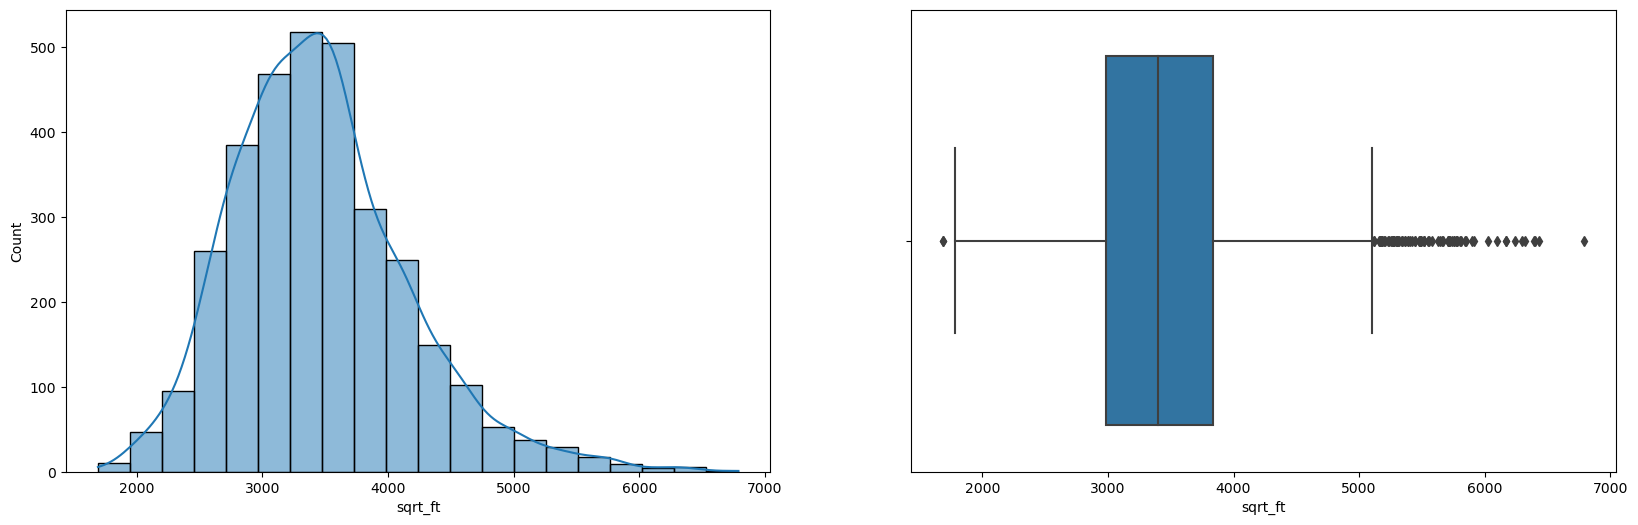

In [105]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.sqrt_ft, bins=20, kde=True)

plt.subplot(122)
sns.boxplot(df.sqrt_ft)
plt.show()

In [106]:
Q1=np.percentile(df.sqrt_ft,25)
Q3=np.percentile(df.sqrt_ft,75)
IQR=stats.iqr(df.sqrt_ft)
Q1,Q3,IQR

(2985.5, 3834.0, 848.5)

In [107]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
lower_lim,upper_lim

(1712.75, 5106.75)

In [108]:
not_outliers = (df.sqrt_ft>= lower_lim) & (df.sqrt_ft<= upper_lim)
df[not_outliers].head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,age
240,1200000.0,85750,-110.844774,32.326842,1.21,10610.26,4,4.0,4426.0,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",0,Natural Stone,117,17
309,1175000.0,85658,-111.099960,32.470520,0.33,11407.46,3,4.0,3388.0,2,"Dishwasher, Refrigerator, Microwave, Oven",2,Wood,550,11
355,1189550.0,85658,-111.100125,32.469548,0.29,845.18,3,4.0,2990.0,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2,"Carpet, Concrete, Natural Stone, Wood",550,9
359,1200000.0,85750,-110.846659,32.326433,1.05,9450.00,4,3.0,4169.0,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2,"Carpet, Natural Stone",110,20
384,1100000.0,85750,-110.810603,32.276485,1.10,10818.58,4,4.0,3404.0,2,"Dishwasher, Garbage Disposal, Microwave, Oven",2,Concrete,700,11


In [109]:
df=df[not_outliers]
df.shape

(3168, 15)

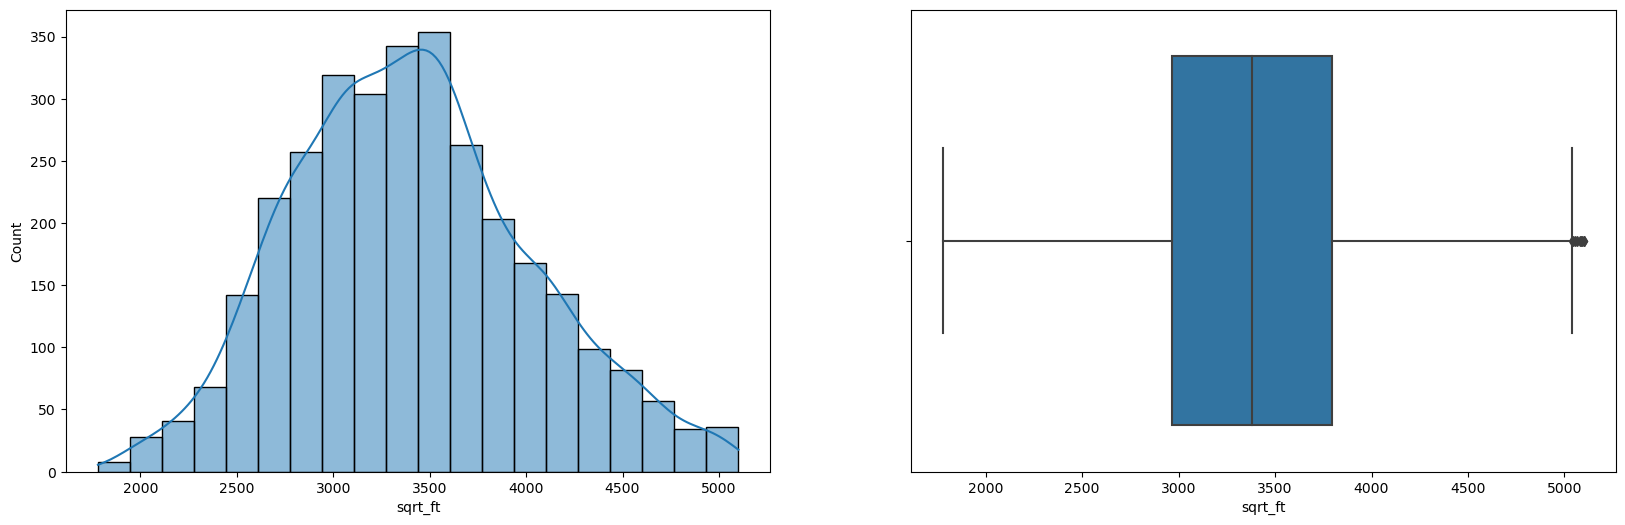

In [110]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.sqrt_ft, bins=20, kde=True)

plt.subplot(122)
sns.boxplot(df.sqrt_ft)
plt.show()

## Garage

In [111]:
df.garage.value_counts()

3      1879
2       996
4       152
0        39
2.5      31
5        25
6        15
1        12
3.5      10
7         3
8         2
9         1
4.5       1
30        1
11        1
Name: garage, dtype: int64

In [112]:
df.garage.replace("None",np.nan, inplace=True)

In [113]:
df.garage.value_counts(dropna=False)

3      1879
2       996
4       152
0        39
2.5      31
5        25
6        15
1        12
3.5      10
7         3
8         2
9         1
4.5       1
30        1
11        1
Name: garage, dtype: int64

In [114]:
df.garage.dtype

dtype('O')

In [115]:
df.garage=df.garage.astype("float64")

In [116]:
df.corr()["garage"].sort_values(ascending=False)

garage        1.000000
sqrt_ft       0.233104
bathrooms     0.180308
sold_price    0.158044
latitude      0.141671
zipcode       0.117500
bedrooms      0.114283
taxes         0.104353
lot_acres     0.056067
longitude    -0.049397
age          -0.301113
Name: garage, dtype: float64

In [117]:
df.garage.mode()[0]

3.0

In [118]:
df.garage.fillna(df.garage.mode()[0], inplace=True)

In [119]:
df.garage.value_counts(dropna=False)

3.0     1879
2.0      996
4.0      152
0.0       39
2.5       31
5.0       25
6.0       15
1.0       12
3.5       10
7.0        3
8.0        2
9.0        1
4.5        1
30.0       1
11.0       1
Name: garage, dtype: int64

In [120]:
df.garage.replace({2.5:3, 3.5:4, 4.5:5}, inplace=True)

In [121]:
df.garage.value_counts(dropna=False)

3.0     1910
2.0      996
4.0      162
0.0       39
5.0       26
6.0       15
1.0       12
7.0        3
8.0        2
9.0        1
30.0       1
11.0       1
Name: garage, dtype: int64

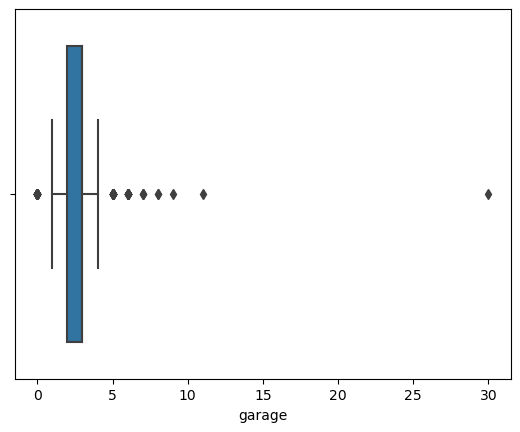

In [122]:
sns.boxplot(df.garage);

In [123]:
df=df[df.garage<=6]
df.shape

(3160, 15)

In [124]:
df.garage.value_counts(dropna=False)

3.0    1910
2.0     996
4.0     162
0.0      39
5.0      26
6.0      15
1.0      12
Name: garage, dtype: int64

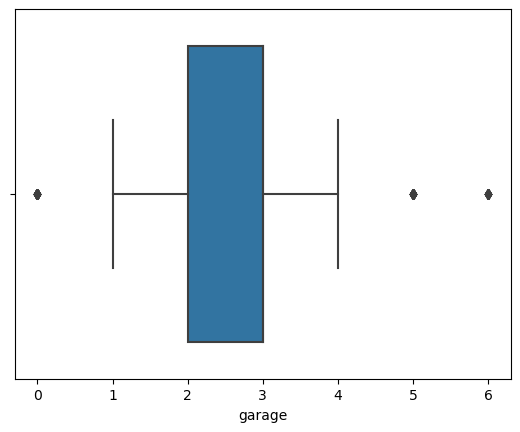

In [125]:
sns.boxplot(df.garage);

## kitchen_features

In [126]:
df.kitchen_features

240     Dishwasher, Garbage Disposal, Refrigerator, Mi...
309             Dishwasher, Refrigerator, Microwave, Oven
355     Dishwasher, Garbage Disposal, Refrigerator, Mi...
359     Dishwasher, Garbage Disposal, Refrigerator, Mi...
384         Dishwasher, Garbage Disposal, Microwave, Oven
                              ...                        
4989    Dishwasher, Double Sink, Garbage Disposal, Gas...
4993    Dishwasher, Double Sink, Electric Range, Garba...
4994    Dishwasher, Double Sink, Electric Range, Garba...
4996    Dishwasher, Double Sink, Electric Range, Garba...
4998    Dishwasher, Double Sink, Garbage Disposal, Gas...
Name: kitchen_features, Length: 3160, dtype: object

In [127]:
df[df.kitchen_features=='None']

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,age
1238,856500.0,85718,-110.918226,32.312599,0.84,6551.90,4,6.0,4086.0,3.0,None,4,"Carpet, Other",174,19
1449,800000.0,85718,-110.912114,32.302594,1.47,5174.83,3,3.0,2771.0,2.0,None,4,Mexican Tile,194,33
1539,730000.0,85750,-110.862542,32.324762,0.36,2613.58,5,5.0,4377.0,3.0,None,3,"Carpet, Natural Stone",44,3
1826,800000.0,85718,-110.925516,32.294196,1.18,7790.37,4,5.0,4834.0,3.0,None,3,"Carpet, Ceramic Tile, Wood, Other",145,17
1872,745000.0,85718,-110.953278,32.331318,0.80,7580.53,5,4.0,4077.0,3.0,None,4,"Concrete, Wood, Other",0,13
3599,600000.0,85718,-110.919346,32.283468,1.26,7166.51,4,4.0,2929.0,3.0,None,1,"Carpet, Ceramic Tile",45,19
3675,556500.0,85658,-111.076821,32.463822,0.48,8534.85,3,3.0,2484.0,2.0,None,3,"Carpet, Natural Stone",249,16
3856,605000.0,85718,-110.935820,32.332468,1.00,4948.44,5,5.0,3327.0,2.0,None,2,Natural Stone,0,39
4314,570111.0,85755,-110.990458,32.426054,0.94,5719.00,4,4.0,3676.0,3.0,None,2,"Carpet, Other",17,17
4735,400000.0,85737,-110.944989,32.399679,0.51,8849.45,3,4.0,4093.0,3.0,None,1,"Carpet, Ceramic Tile",71,20


In [128]:
df[df.kitchen_features=='None'].shape

(12, 15)

In [129]:
ind=list(df[df.kitchen_features=='None'].index)
ind

[1238, 1449, 1539, 1826, 1872, 3599, 3675, 3856, 4314, 4735, 4736, 4843]

In [130]:
df.drop(ind, axis=0, inplace=True)

In [131]:
df.shape

(3148, 15)

## fireplaces

In [132]:
df.fireplaces.value_counts(dropna=False)

1    1258
2    1039
3     474
0     226
4     126
5      25
Name: fireplaces, dtype: int64

In [133]:
df[df.fireplaces==" "]

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,age


In [134]:
df.fireplaces.replace(" ", np.nan,inplace=True)

In [135]:
df.fireplaces.value_counts(dropna=False)

1    1258
2    1039
3     474
0     226
4     126
5      25
Name: fireplaces, dtype: int64

In [136]:
for group in df["bedrooms"].unique():
    cond = df["bedrooms"]==group
    mode = df[cond]["fireplaces"].mode().to_list()  # list(df[cond]["body_type"].mode())
    if mode != []:
        df.loc[cond, "fireplaces"] = df.loc[cond, "fireplaces"].fillna(df[cond]["fireplaces"].mode()[0])
    else:
        df.loc[cond, "fireplaces"] = df.loc[cond, "fireplaces"].fillna(df["fireplaces"].mode()[0])

In [137]:
df.fireplaces.value_counts(dropna=False)

1    1258
2    1039
3     474
0     226
4     126
5      25
Name: fireplaces, dtype: int64

In [138]:
df.fireplaces=df.fireplaces.astype("int64")

In [139]:
df[df.fireplaces==6]

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,age


In [140]:
df.drop(df[df.fireplaces==6].index, axis=0, inplace=True)

In [141]:
df.shape

(3148, 15)

In [142]:
df[df.fireplaces==5]

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,age
469,1140000.0,85718,-110.917248,32.299075,1.88,8196.00,4,5.0,5092.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Other",108,15
550,1000000.0,85718,-110.917250,32.299084,1.42,9644.82,4,5.0,4561.0,3.0,"Dishwasher, Garbage Disposal, Oven",5,"Carpet, Other",22,15
555,1050000.0,85718,-110.915515,32.288808,1.90,7574.63,4,4.0,3389.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,Mexican Tile,194,21
579,1030000.0,85718,-110.939364,32.339167,0.82,11862.82,5,4.0,4316.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Carpet, Natural Stone",161,19
610,950000.0,85737,-110.988991,32.406416,1.08,8161.82,4,4.0,4701.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Natural Stone, Wood",50,18
652,1005000.0,85718,-110.917251,32.299070,1.88,10852.82,4,4.0,4512.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",5,"Carpet, Natural Stone",131,15
711,1090000.0,85712,-110.870492,32.263257,1.31,10303.57,3,4.0,5010.0,3.0,"Desk, Dishwasher, Garbage Disposal, Gas Range,...",5,"Carpet, Concrete",None,33
716,975000.0,85718,-110.939977,32.338549,1.01,10288.84,4,4.0,3875.0,3.0,"Dishwasher, Double Sink, Freezer, Garbage Disp...",5,"Carpet, Mexican Tile",157,20
740,925000.0,85750,-110.868612,32.327368,0.44,8448.00,6,5.0,5042.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Natural Stone",40,14
748,990000.0,85718,-110.910264,32.294609,1.61,10060.00,5,5.0,4879.0,3.0,"Compactor, Dishwasher, Garbage Disposal, Refri...",5,"Carpet, Mexican Tile",194,29


## floor_covering

In [143]:
df.floor_covering.value_counts(dropna=False)

Carpet, Ceramic Tile                               961
Carpet, Natural Stone                              352
Carpet, Ceramic Tile, Wood                         183
Concrete                                           145
Carpet, Mexican Tile                               144
                                                  ... 
Carpet, Ceramic Tile, Wood, Other: Slate             1
Concrete, Wood, Other: Mesquite wood floors          1
Carpet, Laminate, Other: Porclain Tile               1
Carpet, Other: Slate tile                            1
Carpet, Ceramic Tile, Other: Wood Plan Laminate      1
Name: floor_covering, Length: 205, dtype: int64

In [144]:
df[df.floor_covering=="None"]

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,age


## HOA

In [145]:
df.HOA.value_counts()

0         327
None      210
5         110
100        94
40         65
         ... 
157.33      1
53.34       1
87          1
211         1
16.67       1
Name: HOA, Length: 311, dtype: int64

In [146]:
df.HOA.replace("None",np.nan,inplace=True)

In [147]:
df.HOA.isnull().sum()

210

In [148]:
df.HOA.fillna(method="ffill", inplace=True)

In [149]:
df.HOA.isnull().sum()

0

In [150]:
df.HOA=df.HOA.str.replace(',', '').astype("float") 

In [151]:
df.HOA.dtype

dtype('float64')

In [152]:
df.HOA.value_counts()

0.00       340
5.00       129
100.00     102
40.00       66
50.00       62
          ... 
188.33       1
73.72        1
1100.00      1
50.42        1
16.67        1
Name: HOA, Length: 310, dtype: int64

In [153]:
df.HOA.describe()

count    3148.000000
mean       82.198771
std        92.456186
min         0.000000
25%        16.917500
50%        58.000000
75%       125.000000
max      1769.000000
Name: HOA, dtype: float64

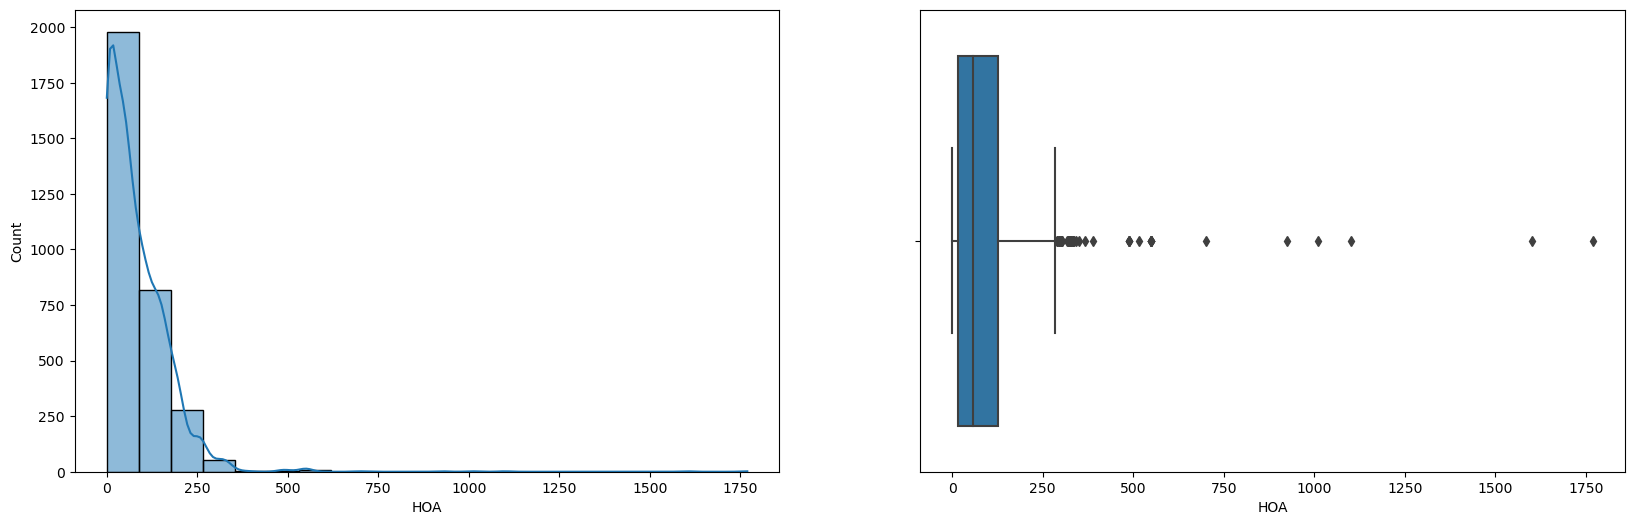

In [154]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.HOA, bins=20, kde=True);

plt.subplot(122)
sns.boxplot(df.HOA);

plt.show()

In [155]:
Q1=np.percentile(df.HOA,25)
Q3=np.percentile(df.HOA,75)
IQR=stats.iqr(df.HOA)
Q1,Q3,IQR

(16.9175, 125.0, 108.0825)

In [156]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
lower_lim,upper_lim

(-145.20625, 287.12375)

In [157]:
df[df.HOA>upper_lim].shape

(59, 15)

In [158]:
not_outliers = (df.HOA>= lower_lim) & (df.HOA<= upper_lim)
df[not_outliers].head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,age
240,1200000.0,85750,-110.844774,32.326842,1.21,10610.26,4,4.0,4426.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",0,Natural Stone,117.0,17
359,1200000.0,85750,-110.846659,32.326433,1.05,9450.00,4,3.0,4169.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2,"Carpet, Natural Stone",110.0,20
398,1125000.0,85718,-110.883547,32.329763,1.33,8654.00,4,5.0,5023.0,3.0,"Compactor, Dishwasher, Garbage Disposal, Refri...",3,"Carpet, Natural Stone, Wood",179.0,33
400,1100000.0,85750,-110.866891,32.321968,1.17,6565.93,4,4.0,3870.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2,"Carpet, Natural Stone",58.0,25
406,1200000.0,85750,-110.830980,32.283092,1.18,9556.54,4,4.0,4762.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2,Natural Stone,175.0,15


In [159]:
df=df[not_outliers]
df.shape

(3089, 15)

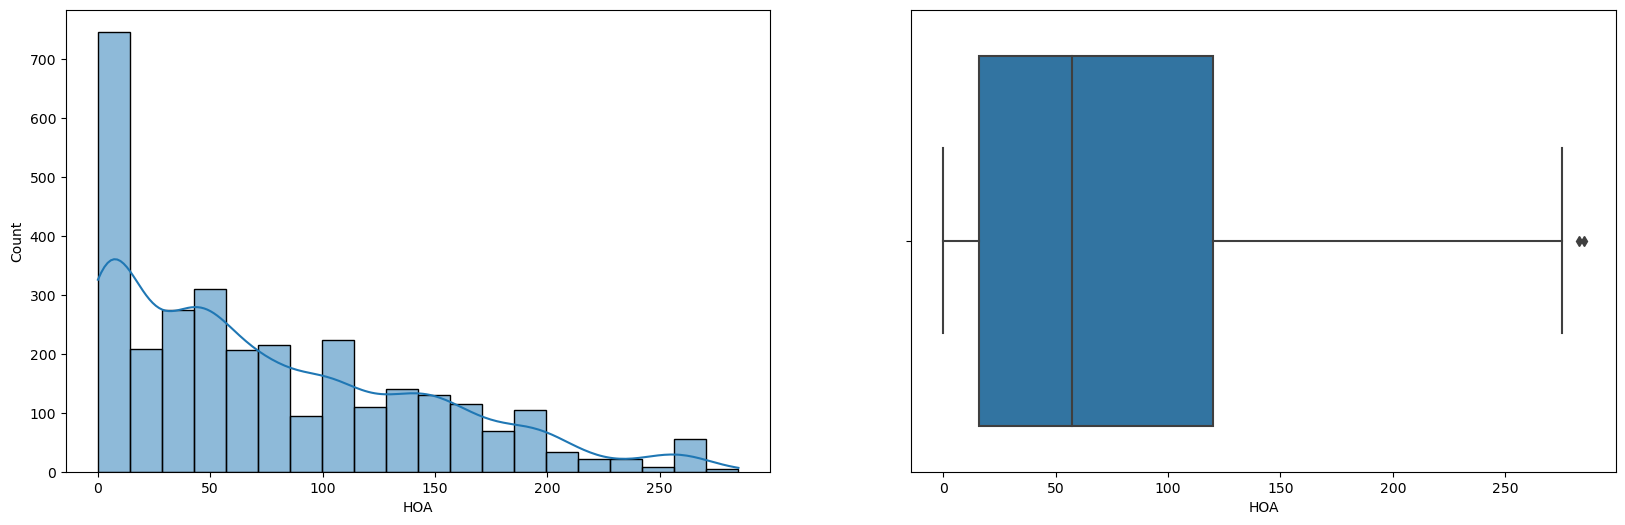

In [160]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.histplot(df.HOA, bins=20, kde=True);

plt.subplot(122)
sns.boxplot(df.HOA);

plt.show()

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3089 entries, 240 to 4998
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sold_price        3089 non-null   float64
 1   zipcode           3089 non-null   int64  
 2   longitude         3089 non-null   float64
 3   latitude          3089 non-null   float64
 4   lot_acres         3089 non-null   float64
 5   taxes             3089 non-null   float64
 6   bedrooms          3089 non-null   int64  
 7   bathrooms         3089 non-null   float64
 8   sqrt_ft           3089 non-null   float64
 9   garage            3089 non-null   float64
 10  kitchen_features  3089 non-null   object 
 11  fireplaces        3089 non-null   int64  
 12  floor_covering    3089 non-null   object 
 13  HOA               3089 non-null   float64
 14  age               3089 non-null   int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 386.1+ KB


In [162]:
df.reset_index(drop=True)

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,age
0,1200000.0,85750,-110.844774,32.326842,1.21,10610.26,4,4.0,4426.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",0,Natural Stone,117.0,17
1,1200000.0,85750,-110.846659,32.326433,1.05,9450.00,4,3.0,4169.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2,"Carpet, Natural Stone",110.0,20
2,1125000.0,85718,-110.883547,32.329763,1.33,8654.00,4,5.0,5023.0,3.0,"Compactor, Dishwasher, Garbage Disposal, Refri...",3,"Carpet, Natural Stone, Wood",179.0,33
3,1100000.0,85750,-110.866891,32.321968,1.17,6565.93,4,4.0,3870.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2,"Carpet, Natural Stone",58.0,25
4,1200000.0,85750,-110.830980,32.283092,1.18,9556.54,4,4.0,4762.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2,Natural Stone,175.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,545000.0,85745,-111.061493,32.306472,1.19,6326.96,4,3.0,3720.0,4.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,Ceramic Tile,12.0,12
3085,565000.0,85750,-110.820216,32.307646,0.83,4568.71,4,3.0,2813.0,2.0,"Dishwasher, Double Sink, Electric Range, Garba...",2,"Carpet, Mexican Tile",6.0,33
3086,535000.0,85718,-110.922291,32.317496,0.18,4414.00,3,2.0,2106.0,2.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,Ceramic Tile,198.0,17
3087,550000.0,85750,-110.858556,32.316373,1.42,4822.01,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43.0,29


In [163]:
df.corr()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,age
sold_price,1.000000,0.003582,0.012192,0.016357,0.213431,0.476020,0.135169,0.366330,0.511681,0.191984,0.314445,0.230776,-0.154077
zipcode,0.003582,1.000000,0.447537,-0.080329,0.007577,-0.065801,0.062972,-0.023639,0.053452,0.124968,0.011490,-0.011406,-0.045862
longitude,0.012192,0.447537,1.000000,-0.440554,0.039723,-0.041174,0.118253,0.019584,0.131031,-0.050836,0.090871,0.033739,0.214645
latitude,0.016357,-0.080329,-0.440554,1.000000,-0.217061,-0.028691,-0.252380,-0.043156,-0.152105,0.178016,-0.164711,0.278383,-0.378414
lot_acres,0.213431,0.007577,0.039723,-0.217061,1.000000,0.214863,0.176412,0.142366,0.302651,0.064227,0.237957,-0.160130,0.242904
taxes,0.476020,-0.065801,-0.041174,-0.028691,0.214863,1.000000,0.183253,0.272116,0.493386,0.158549,0.367712,0.147306,-0.000201
bedrooms,0.135169,0.062972,0.118253,-0.252380,0.176412,0.183253,1.000000,0.397864,0.503752,0.154749,0.168648,-0.237714,0.109123
bathrooms,0.366330,-0.023639,0.019584,-0.043156,0.142366,0.272116,0.397864,1.000000,0.606939,0.226303,0.157322,0.021017,-0.049916
sqrt_ft,0.511681,0.053452,0.131031,-0.152105,0.302651,0.493386,0.503752,0.606939,1.000000,0.281904,0.342278,-0.040309,0.085329
garage,0.191984,0.124968,-0.050836,0.178016,0.064227,0.158549,0.154749,0.226303,0.281904,1.000000,0.018701,0.019941,-0.367090


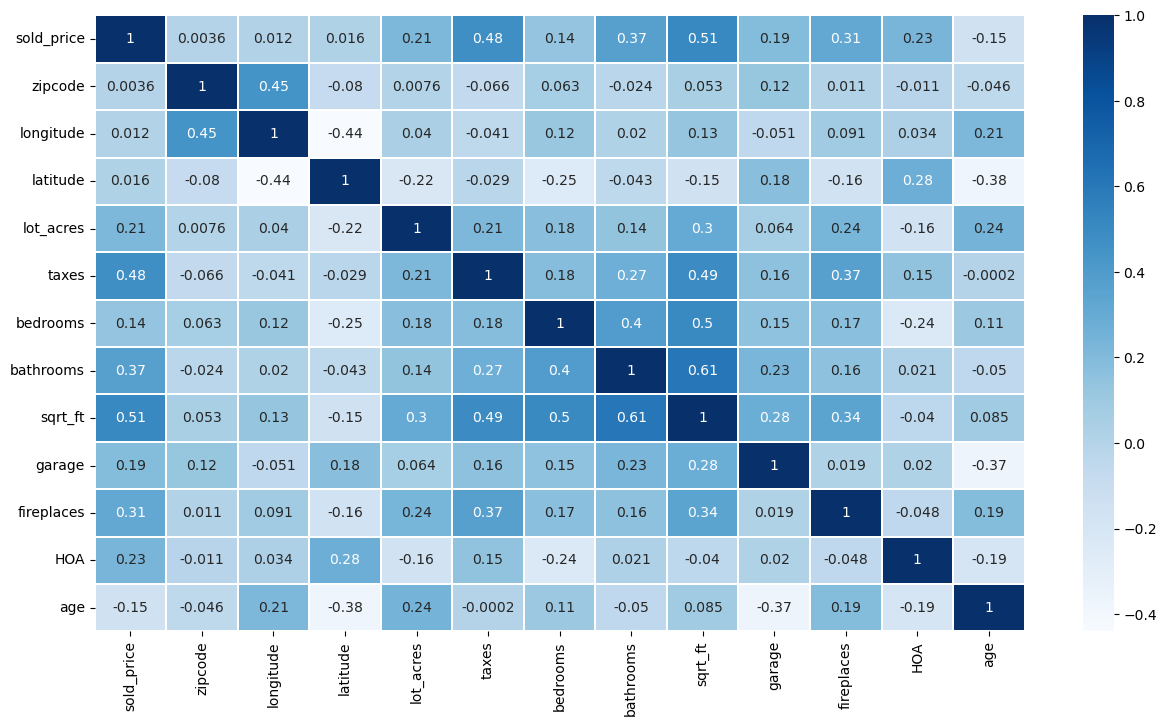

In [164]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, cmap="Blues",linewidths=0.2);

# Conclusion 

The dataset initially consisted of 5000 rows and 16 columns. The "MLS" column had all unique values, so I removed it from the dataset. I calculated the age of the houses based on the year 2019 and removed the "year_build" column from the dataset. I filled in the missing values ​​of all columns with the appropriate values ​​and cleaned out the outliers. I did not convert categorical columns to numeric values. The final dataset consists of 3089 rows and 15 columns.